In [19]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4)

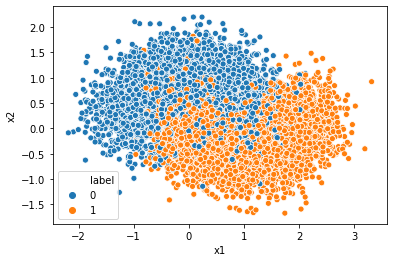

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

reduced_data = pd.DataFrame(X, columns=['x1', 'x2'])
reduced_data['label'] = y
sns.scatterplot(x='x1', y='x2', hue='label', data=reduced_data)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
params = {
    'max_leaf_nodes':[*range(15, 25)],
    'min_samples_leaf':[1, 100]
}

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(DecisionTreeClassifier(), params)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [15, 16, 17, 18, 19, 20, 21, 22,

In [47]:
dt_clf = grid_search.best_estimator_

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.86
[[821 167]
 [113 899]]


# Growing a Forest

In [81]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, train_size=100/len(X_train), random_state=420)

X_subsets = []
y_subsets = []

for train_index, test_index in rs.split(X_train, y_train):
    X_subsets.append(X_train[train_index])
    y_subsets.append(y_train[train_index])

In [93]:
d_trees = []
val_scores = []
val_pred = []

for (subset_X, subset_y) in zip(X_subsets, y_subsets):
    dt = dt_clf
    dt.fit(subset_X, subset_y)
    pred = dt.predict(X_test)
    val_pred.append(pred)
    val_scores.append(accuracy_score(y_test, pred))
    d_trees.append(dt)

In [94]:
import numpy as np
np.array(val_scores).mean()

0.7872795

In [102]:
from scipy.stats import mode

final_pred = mode(val_pred).mode[0]

In [104]:
accuracy_score(y_test, final_pred)

0.86